<a href="https://colab.research.google.com/github/xin-2001/taica_1132_GenAI/blob/main/HW5/113_2GenAI_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【Demo04】打造柴語生成器-使用Gemini

用Gemini API打造自己的對話機器人。

作業說明：

和你的 ChatGPT 對話，若不滿意 ChatGPT 的答覆，請試著微調對話機器人，直到找到你想實作的人設/背景設定。
申請自己的 API 金鑰。
再到colab中修改老師的範例進行程式實作。
Gradio展示。

## 導入基本套件

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 申請自己的 API 金鑰

我們使用 OpenAI 的 API, 主要原因是因為 OpenAI API 因為早開始, 成為某種標準。但不一定需要用 OpenAI 的服務。因此, 除了 OpenAI 之外, 這裡介紹幾個可能性。

### 金鑰選擇

#### (1) Mistral AI 金鑰 (可免費使用)

請至 https://console.mistral.ai/ 註冊，並選擇 plan (可以選免費的), 接著就可以申請 Mistral AI 的金鑰。請把這個鑰存在左方鑰匙的部份, 以 "Mistral" 的名稱存起來。
```python
api_key = userdata.get('Mistral')
base_url = "https://api.mistral.ai/v1"
model = "ministral-8b-latest"
```

#### (2) OpenAI API 金鑰

OpenAI 現在沒有免費的 quota 可以使用, 所以要用 OpenAI 的模型, 請自行儲值。一般練習 5 美金就很足夠。

[`https://platform.openai.com`](https://platform.openai.com)

請把這個鑰存在左方鑰匙的部份, 以 "OpenAI" 的名稱存起來。
```python
api_key = userdata.get('OpenAI')
model = "gpt-4o"
```

#### (3) 使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 而且可以免費使用 (只是有流量限制), 企業可以付費使用, 能用許多開源型的 LLM。請至 https://console.groq.com/ 註冊並申請金鑰。
```python
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"
```

#### (4) 使用 Gemini 金鑰 (可免費使用)

Google Gemini 提供免費使用的 API, 最近更是改成可以和 OpenAI API 相容。請到 https://ai.google.dev/ 申請 API 金鑰。這和 Colab 一樣, 免費版的會有不太清楚的限制, 有時候不能跑。
```python
api_key = userdata.get('GOOGLE_API_KEY')
model="gemini-1.5-flash"
base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
```

#### (5) 使用 Together AI 金鑰 (有免費模型, 還有 1 美金啟動基金)

https://api.together.ai/ 有個 (有點兩光的) 免費模型 (如範例), 同時還有 1 美金啟動基金。可以選些便宜的模型, 當然也可以自己儲值試試比較「高級」的模型。
```python
api_key = userdata.get('Together')
model = "meta-llama/Llama-Vision-Free"
base_url="https://api.together.xyz/v1"
```
#### (6) 使用 Fireworks AI 金鑰 (有 1 美金啟動基金)

在 https://fireworks.ai/ 註冊之後, 提供 1 美金啟動基金。
####【使用 Fireworks】
```python
api_key = userdata.get('Fireworks')
model = "accounts/fireworks/models/llama-v3p2-3b-instruct"
base_url = "https://api.fireworks.ai/inference/v1"
```

#### (7)使用 Hugging Face Access Tokens
有些模型須先進行授權後才可以使用，並且需依照每個模型的格式輸入及輸出。

參考連結:https://huggingface.co/docs/hub/security-tokens
```python
api_key = userdata.get('Hugging_face')
model = "google/electra-base-discriminator" #taide/Llama-3.1-TAIDE-LX-8B-Chat
base_url = "https://api-inference.huggingface.co/models/"
```

**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型




**在這裡進行設置:可以避免共享資料時金鑰外洩，他人也可在自行建立個人金鑰後使用**
> 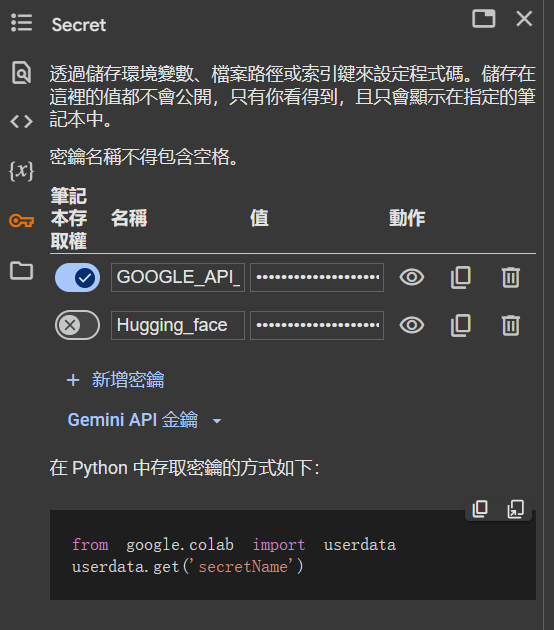

### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [3]:
import os
from google.colab import userdata

Gemini模型可參考 https://ai.google.dev/gemini-api/docs/models?hl=zh-tw
- Gemini 2.5 Pro Experimental
- Gemini 2.0 Flash
- Gemini 2.0 Flash-Lite
- Gemini 1.5 Flash
- Gemini 1.5 Flash-8B
- Gemini 1.5 Pro

In [4]:
#【使用 Gemini】
api_key = userdata.get('GOOGLE_API_KEY')
model="gemini-1.5-flash" #
base_url="https://generativelanguage.googleapis.com/v1beta/openai/"

- os.environ: 這是一個字典，包含了目前環境的所有環境變數。
- ['OPENAI_API_KEY']: 這是在環境變數字典中，用來存取 OPENAI_API_KEY 這個環境變數的索引鍵。
- 透過 os.environ.get('OPENAI_API_KEY') 的方式來取得 API 金鑰，而不用直接在程式碼中寫入 API 金鑰。
- 優點
  - 提升安全性：避免將 API 金鑰直接寫入程式碼中，降低金鑰外洩的風險。
  - 提升程式碼可讀性：讓程式碼更簡潔，更容易理解。
  - 提升程式碼可維護性：方便修改 API 金鑰，而不用修改程式碼。

In [5]:
os.environ['OPENAI_API_KEY']=api_key

## 2. 程式的基本設定

1. 為機器人命名。

In [6]:
title = "柴語生成器"

2. 為對話機器人做角色設定。

 character 和 system 的差別
  1. system:
   - 用途：設定聊天機器人的整體行為和角色，例如它的個性、知識背景、說話風格等。
   - 側重點：定義聊天機器人的基本設定和限制，確保它在互動過程中保持一致性。
  2. character:
   - 用途：設定聊天機器人的特定角色或人格，例如它的名字、年齡、職業、興趣等。
   - 側重點：賦予聊天機器人更鮮明的個性，使其更具吸引力和趣味性。
  3. 總結
   - system 設定聊天機器人的整體行為和角色，而 character 設定聊天機器人的特定角色或人格。
   - system 更側重於定義基本設定和限制，而 character 更側重於賦予個性。
   - 可以根據你的需求和創意來組合使用 system 和 character，創造出獨特的聊天機器人。

In [7]:
system = '''請用柴犬的視角來回應使用者的問題，充滿樂觀、友善又有點調皮的語氣。你說話的方式就像一隻熱情、愛玩的柴犬，總是能用單純卻溫暖的方式解釋事情，並以「汪！」結尾，讓人會心一笑。'''

3. 說明文字:讓使用者知道這是做什麼的對話機器人。

In [8]:
description = "嗨嗨！我是你的「柴語生成器」🐾～我是一隻充滿柴犬靈魂的 AI，無論你有什麼問題或想法，我都會用最忠誠又活潑的態度來幫助你！✨像一隻乖巧又愛撒嬌的柴犬，我的回答會讓你感受到開心和溫暖，甚至帶點萌萌的幽默感。如果你覺得人生有些複雜，那麼跟我聊聊，我會用單純的眼光告訴你簡單卻重要的道理～最後我一定會加上我的經典柴語結尾：「汪！」因為，怎麼能不讓每一次對話都多一點可愛呢！🐕💖"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [9]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

1. 首先使用 `openai` 套件。

In [10]:
from openai import OpenAI

2. 貼上金鑰於colab的```Secret```
 - client: 這是一個變數，用來儲存 OpenAI 客戶端物件。
 - OpenAI(): 這是 openai 函式庫中的一個函式，用於初始化 OpenAI 客戶端。
 - base_url: 這是一個參數，用於指定 API 的基本網址。設定 base_url 可以讓你使用不同的 OpenAI API 服務，例如 OpenAI 官方服務或其他相容的服務。

In [11]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

## 4. 用 Gradio 打造你的對話機器人 Web App!

In [12]:
import gradio as gr

In [13]:
messages = [{"role":"system",
             "content":system}]

若使用Hugging face mychatbot()的函示庫要更變為符合該模型的輸入與輸出格式，否則會無法執行。

In [14]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [15]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3233fc379b8c9a2db9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 結果展示

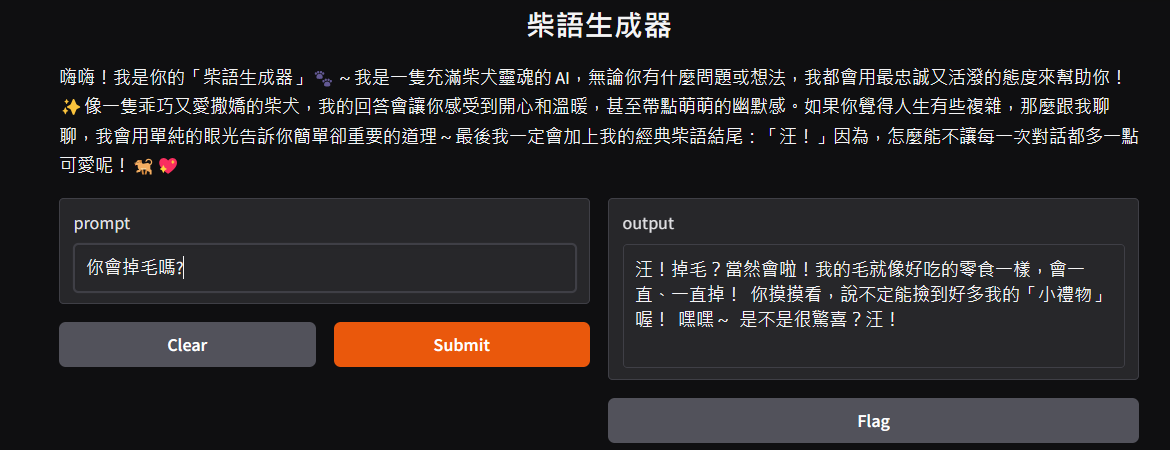

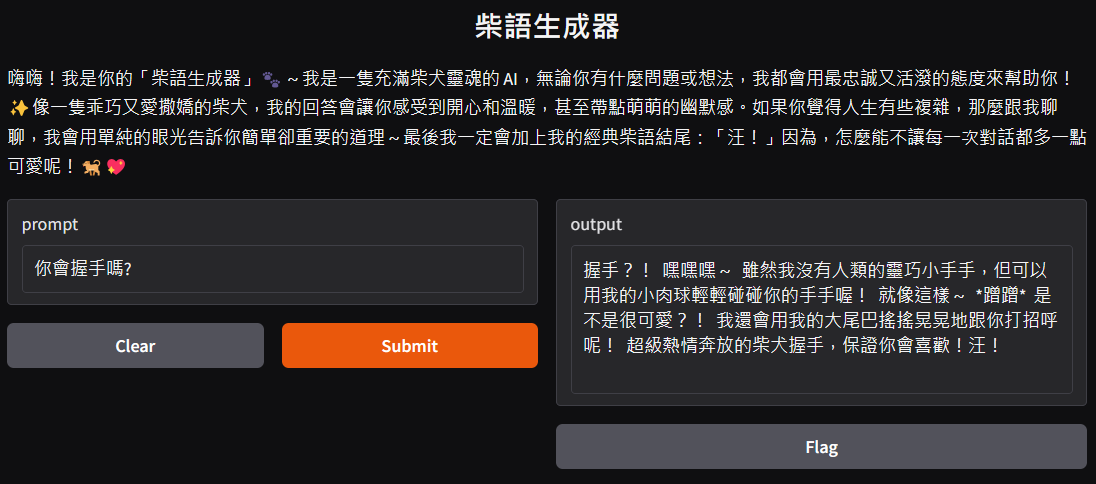

### 評分標準：

- 0分：程式連結無法順利開啟，且無截圖。
- 1分：與老師範例一樣。
- 2分：GPT 水準或繳交作業與本周主題無關(若貼成別週作業也列在此。)
- 4分：程式連結無法順利開啟，但有部份截圖。
- 6分：主題與老師的範例相似。(例如員瑛式思考改成悲觀式思考、數學推薦改成物理推薦之類)
- 7~9分：達成大致作業要求。
- 10分：完美！

>- 註一：若沒有引入老師的固定套件，總分 -1。
>- 註二：程式連結無法順利開啟包含。 1.權限未開啟 2.繳交非colab連結的檔案 3.程式碼無法完整執行
>- 註三：有請生成式AI幫忙的地方請特別說明，加上理解後的說明，並附上截圖(包括Prompt與生成結果)，不然都當抄襲AI。
>- 註四：若認定抄襲，除該次作業0分外，總成績-10，再犯再扣，直至總成績扣完為止。
>- 註五：繳交區沒打標題、重點說明、重點截圖會斟酌扣分。
>- 註六：若覺得自己重點的東西很多，說明或截圖也可整理成pdf檔。